## Model Training

#### 1.1 Import Data and Required Packages
##### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [2]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

#### Import the CSV Data as Pandas DataFrame

In [3]:
df = pd.read_csv('data/raw.csv')

#### Show Top 5 Records

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost,listed_in
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


#### Preparing X and Y variables

In [5]:
X = df.drop(columns=['rate'],axis=1)

In [6]:
X.head()

,name,online_order,book_table,votes,approx_cost,listed_in
0,Jalsa,Yes,Yes,775,800,Buffet
1,Spice Elephant,Yes,No,787,800,Buffet
2,San Churro Cafe,Yes,No,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,88,300,Buffet
4,Grand Village,No,No,166,600,Buffet


In [8]:
print("Categories in 'online_order' variable:",end=" " )
print(df['online_order'].unique())

print("Categories in 'book_table' variable:",end=" ")
print(df['book_table'].unique())

print("Categories in'listed_in' variable:",end=" " )
print(df['listed_in'].unique())

print("Categories in 'name' variable:",end=" " )
print(df['name'].unique())

print("Categories in 'approx_cost' variable:",end=" " )
print(df['approx_cost'].unique())

print("Categories in 'votes' variable:",end=" " )
print(df['votes'].unique())

Categories in 'online_order' variable: ['Yes' 'No']
Categories in 'book_table' variable: ['Yes' 'No']
Categories in'listed_in' variable: ['Buffet' 'Cafes' 'other' 'Dining']
Categories in 'name' variable: ['Jalsa' 'Spice Elephant' 'San Churro Cafe' 'Addhuri Udupi Bhojana'
 'Grand Village' 'Timepass Dinner'
 'Rosewood International Hotel - Bar & Restaurant' 'Onesta'
 'Penthouse Cafe' 'Smacznego' 'Village CafÃ©' 'Cafe Shuffle'
 'The Coffee Shack' 'Caf-Eleven' 'Cafe Vivacity' 'Catch-up-ino'
 "Kirthi's Biryani" 'T3H Cafe' '360 Atoms Restaurant And Cafe'
 'The Vintage Cafe' 'Woodee Pizza' 'Cafe Coffee Day' 'My Tea House'
 'Hide Out Cafe' 'CAFE NOVA' 'Coffee Tindi' 'Sea Green Cafe' 'Cuppa'
 "Srinathji's Cafe" 'Redberrys' 'Foodiction' 'Sweet Truth'
 'Ovenstory Pizza' 'Faasos' 'Behrouz Biryani' 'Fast And Fresh'
 'Szechuan Dragon' 'Empire Restaurant' 'Maruthi Davangere Benne Dosa'
 'Chaatimes' 'Havyaka Mess' "McDonald's" "Domino's Pizza" 'Hotboxit'
 'Kitchen Garden' 'Recipe' 'Beijing Bites' 'Tas

In [9]:
y = df['rate']

In [10]:
y

0      4.1
1      4.1
2      3.8
3      3.7
4      3.8
      ... 
143    3.3
144    3.3
145    4.0
146    3.0
147    3.9
Name: rate, Length: 148, dtype: float64

In [11]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [12]:
X = preprocessor.fit_transform(X)

In [13]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 888 stored elements and shape (148, 155)>

In [14]:
X.shape

(148, 155)

In [15]:
X.shape

(148, 155)

In [16]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((118, 155), (30, 155))

#### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [19]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.0000
- Mean Absolute Error: 0.0000
- R2 Score: 1.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4155
- Mean Absolute Error: 0.3203
- R2 Score: 0.1905


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.3824
- Mean Absolute Error: 0.3112
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4679
- Mean Absolute Error: 0.4032
- R2 Score: -0.0264


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.1457
- Mean Absolute Error: 0.1131
- R2 Score: 0.8548
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.4269
- Mean Absolute Error: 0.3390
- R2 Score: 0.1454


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.2761
- Mean Absolute Error: 0.2068
- R2 Score: 0.4787
----------------------

### Results

In [20]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
8,AdaBoost Regressor,0.315475
6,XGBRegressor,0.207021
0,Linear Regression,0.190532
7,CatBoosting Regressor,0.187332
5,Random Forest Regressor,0.171381
2,Ridge,0.145374
4,Decision Tree,0.060742
1,Lasso,-0.026353
3,K-Neighbors Regressor,-0.102667


## Linear Regression

In [21]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 19.05


## Plot y_pred and y_test

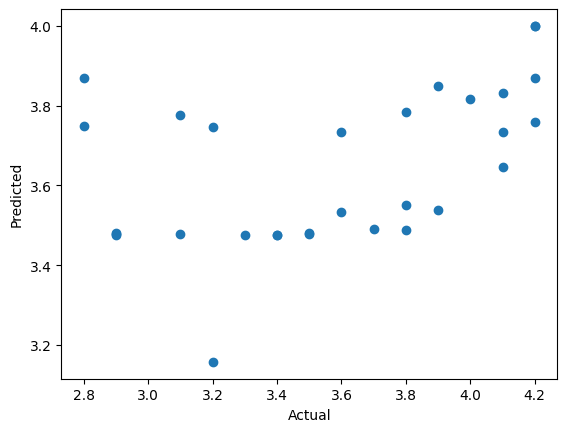

In [22]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

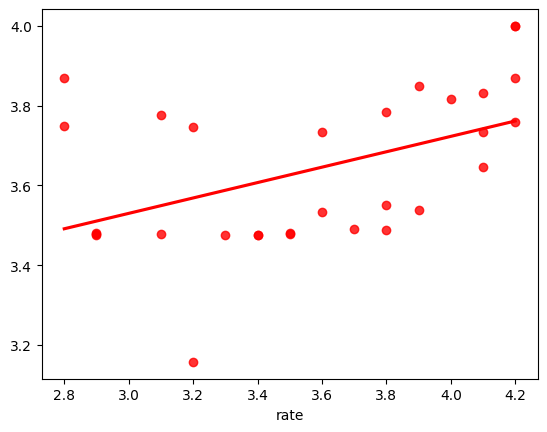

In [23]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');

#### Difference between Actual and Predicted Values

In [24]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
125,2.9,3.478636,-0.578636
51,4.1,3.732891,0.367109
139,2.9,3.475615,-0.575615
19,3.1,3.775370,-0.675370
104,3.2,3.157712,0.042288
12,4.2,3.999786,0.200214
76,4.1,3.832919,0.267081
31,2.8,3.869622,-1.069622
81,4.2,3.758182,0.441818
9,4.2,3.869849,0.330151
